In [67]:
import codecs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
%matplotlib inline

In [2]:
path = "data/"

# FCE

In [3]:
#prof_entire_docs_students = codecs.open(path+"proficiency_entire_docs.txt", "r", "utf-8").read().split("\n")
#docscore_entire_docs_students = codecs.open(path+"docscore_entire_docs.txt", "r", "utf-8").read().split("\n")
#first_lang = codecs.open(path+"firstlang_entire_docs.txt", "r", "utf-8").read().split("\n")

pr_entire = [float(l.strip().split()[0]) for l in open(path+"proficiency_entire_docs.txt",'r').readlines()]
ID_entire = [l.strip().split()[1] for l in open(path+"proficiency_entire_docs.txt",'r').readlines()]
docscore_entire = [l.strip().split()[0] for l in open(path+"docscore_entire_docs.txt",'r').readlines()]
docscore_entire = [float(i.strip("T")) for i in docscore_entire]
student_preds_entire = pd.read_csv(path+'student_preds_softmax_entire_docs-2.txt', sep=' ', names=['conf_0', 'conf_1'], header=None)
M = np.genfromtxt("data/student_preds_softmax_entire_docs-2.txt", delimiter=' ',skip_header=0)
first_lang_entire = [l.strip().split()[0] for l in open(path+"firstlang_entire_docs.txt",'r').readlines()]

In [4]:


preds_entire = [1 if i >0.5 else 0 for i in student_preds_entire.conf_1]
temp_entire = {"ID": ID_entire, "proficiency_score": pr_entire, "docscore":docscore_entire, "pred":preds_entire, "first_lang":first_lang_entire}
temp_entire_df = pd.DataFrame(temp_entire)
df_entire = pd.concat([temp_entire_df, student_preds_entire], axis=1)

In [5]:
print(len(df_entire))
df_entire.head()

194


,ID,docscore,first_lang,pred,proficiency_score,conf_0,conf_1
0,TE23*0100*2001*01,3.1,Spanish,1,21.0,0.471153,0.528847
1,TE23*0100*2001*01,2.2,Spanish,0,21.0,0.587780,0.412220
2,TE72*0100*2001*01,5.1,Japanese,1,38.0,0.208587,0.791413
3,TE72*0100*2001*01,5.3,Japanese,1,38.0,0.360887,0.639113
4,TE70*0100*2001*01,4.1,Greek,1,26.0,0.395363,0.604637


In [6]:
df_entire_t = df_entire[(df_entire.conf_1>0.5)]
#df_entire_t = df_entire_t[(df_entire_t.docscore>2)]
print(stats.spearmanr(df_entire_t["docscore"], df_entire_t["conf_1"]))

SpearmanrResult(correlation=-0.18656321135866874, pvalue=0.035715789279599515)


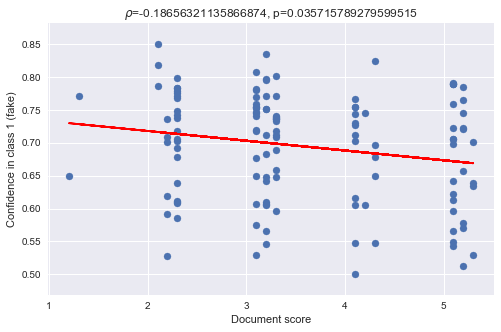

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df_entire_t["docscore"], df_entire_t["conf_1"])

z = np.polyfit(df_entire_t["docscore"], df_entire_t["conf_1"], 1)
p = np.poly1d(z)
ax.plot(df_entire_t["docscore"],p(df_entire_t["docscore"]), color="r", linestyle="solid")
r = r'$\rho$'
plt.title(r+"=-0.18656321135866874, p=0.035715789279599515")
plt.ylabel("Confidence in class 1 (fake)")
plt.xlabel("Document score")

plt.savefig("conf1_docsore_scatter.png", dpi=100)

In [8]:
#stats.shapiro(df_entire_t["docscore"])

In [9]:
#fig, ax = plt.subplots(figsize=(8,5))
#ax.hist(df_entire_t["docscore"], bins=len(df_entire_t["docscore"]))

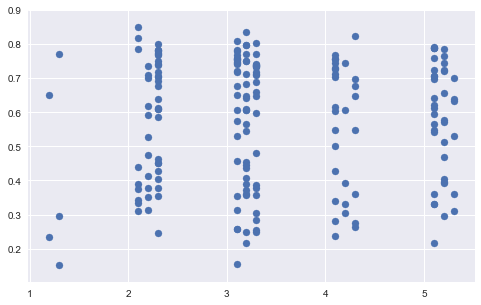

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df_entire["docscore"], df_entire["conf_1"])
#plt.title("correlation=-0.18656321135866874, pvalue=0.035715789279599515")


In [11]:
entire_grouped_on_ID = df_entire.groupby(['ID', 'proficiency_score', "first_lang"], as_index=False).mean()
#entire_grouped_on_ID.proficiency_score = entire_grouped_on_ID.proficiency_score/2
#entire_grouped_on_ID = entire_grouped_on_ID[(entire_grouped_on_ID.proficiency_score>22)] # no grades below 22
entire_grouped_on_ID.head()

,ID,proficiency_score,first_lang,docscore,pred,conf_0,conf_1
0,TE1*0100*2001*01,30.0,French,3.75,0.5,0.425301,0.574699
1,TE10*0100*2001*01,26.0,Chinese,3.20,0.5,0.588776,0.411224
2,TE11*0100*2001*01,23.0,Italian,2.70,0.5,0.407784,0.592216
3,TE12*0100*2001*01,26.0,Japanese,3.65,1.0,0.280753,0.719247
4,TE13*0100*2001*01,26.0,Italian,3.30,1.0,0.372626,0.627374


In [12]:
entire_grouped_on_ID[entire_grouped_on_ID.ID=="TE23*0100*2001*01"]

,ID,proficiency_score,first_lang,docscore,pred,conf_0,conf_1
15,TE23*0100*2001*01,21.0,Spanish,2.65,0.5,0.529466,0.470534


SpearmanrResult(correlation=0.0321449716529837, pvalue=0.7546089952495417)


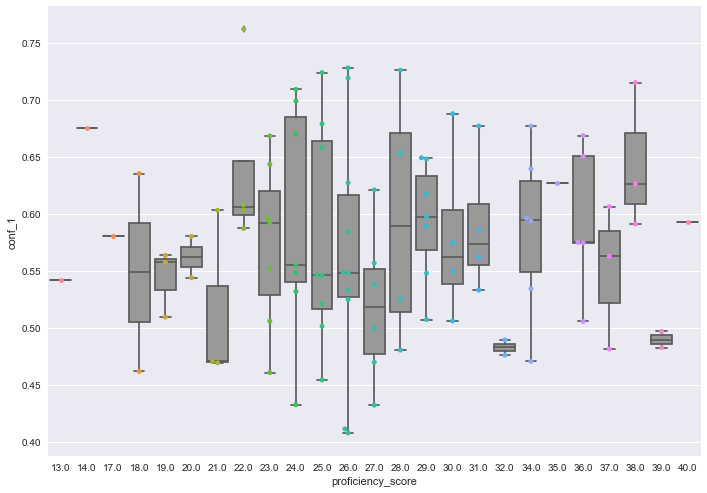

In [13]:
print(stats.spearmanr(entire_grouped_on_ID["proficiency_score"], entire_grouped_on_ID["conf_1"]))

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="proficiency_score", y="conf_1",data=entire_grouped_on_ID, color="0.6", )
sns.swarmplot(x="proficiency_score", y="conf_1", data=entire_grouped_on_ID)


#plt.savefig("figname.png", dpi=300) # dpi=resolution

In [14]:
def difference_plot():
    Grades=[l.strip().split()[0] for l in open("data/proficiency_entire_docs.txt",'r').readlines()]
    M = np.genfromtxt("data/student_preds_softmax_entire_docs-2.txt", delimiter=' ',skip_header=0)
    
    A,B=[],[]
    M_normed = M
    for i in range(len(Grades)):
        A.append(M[i,1])
        B.append(float(Grades[i]))
    

    even=True
    A_,B_=[],[]
    for (a,b) in zip(A,B):
        if even:
            (prev_a,prev_b)=(a,b)
            even=False
        else:
            if b in range(20,40):
                A_.append(abs(a-prev_a))
                B_.append(b)
            even=True
    #print(A_)
    #print(B_)
    print("diff:"+str(stats.spearmanr(A_,B_)))
    plt.scatter(B_,A_)

diff:SpearmanrResult(correlation=0.10064206522633412, pvalue=0.3508309089294942)


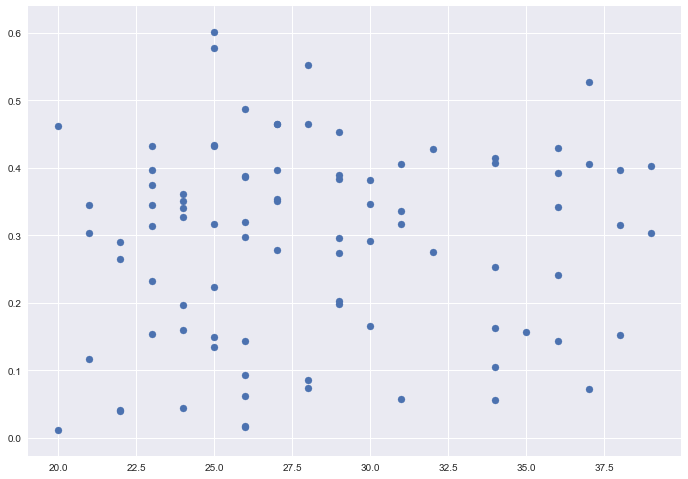

In [15]:
difference_plot()

In [96]:
def boxplot_firstlang(conf_score, prof_score, firstlang):
    sns.set_style('white')
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context('paper', font_scale=1.4)
    author_and_lang = pd.DataFrame(
    {'conf_fake': conf_score,
     'score': prof_score,
     'first_lang': firstlang
    })
    ax = sns.boxplot(x="score", y="conf_fake",data=author_and_lang, color="white")#hue="first_lang"
    ax = sns.swarmplot(x="score", y="conf_fake", data=author_and_lang,hue="first_lang", palette="coolwarm")
    # iterate over boxes
    for i,box in enumerate(ax.artists):
        box.set_edgecolor('black')
        box.set_facecolor('white')

        # iterate over whiskers and median lines
        for j in range(6*i,6*(i+1)):
             ax.lines[j].set_color('black')
    ax.legend(title="First language",loc='center', bbox_to_anchor=(1.15, 0.5))
    plt.savefig("FCE_boxplot_warm.png", dpi=100, bbox_inches='tight')

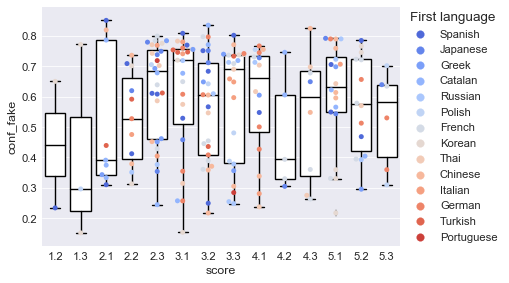

In [97]:
boxplot_firstlang(list(student_preds_entire.conf_1), docscore_entire, first_lang_entire)

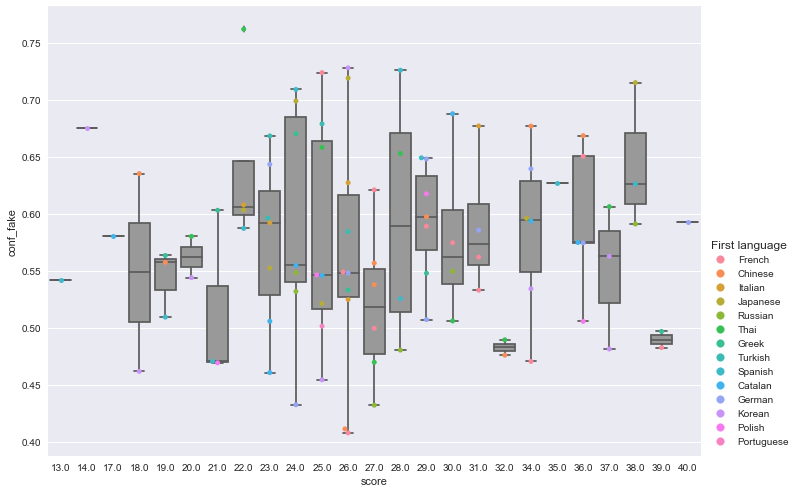

In [19]:
entire_grouped_on_ID
boxplot_firstlang(list(entire_grouped_on_ID.conf_1), entire_grouped_on_ID.proficiency_score, entire_grouped_on_ID.first_lang)

In [32]:
#sns.boxplot(df_entire.docscore, df_entire.conf_1)

In [20]:
diff_score = []
df_entire.iloc[0].ID
prev_id = None
grade = []
firstlang= []

for i in range(len(df_entire)):
    curr_id = df_entire.iloc[i].ID
    if curr_id != prev_id:
        curr_score = df_entire.iloc[i].conf_1
    else:
        if df_entire.iloc[i].proficiency_score >20:
            next_score = df_entire.iloc[i].conf_1
            diff_score.append(abs(curr_score-next_score))
            grade.append(df_entire.iloc[i].proficiency_score)
            firstlang.append(df_entire.iloc[i].first_lang)
    prev_id = curr_id
        

In [21]:
len(diff_score)

87

SpearmanrResult(correlation=0.07588496945665975, pvalue=0.48481543168172947)


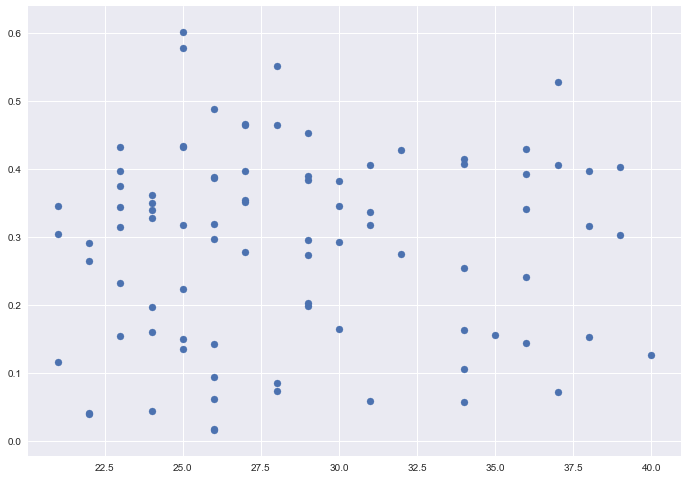

In [22]:
print(stats.spearmanr(grade,diff_score))
plt.scatter(grade,diff_score)

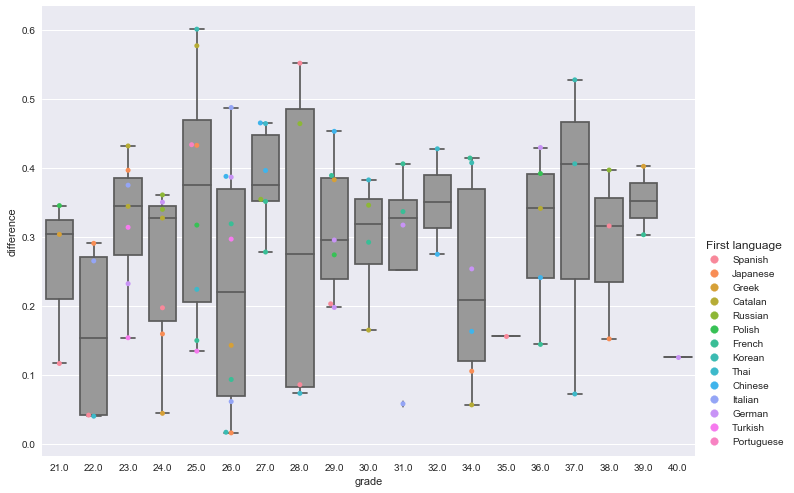

In [23]:

author_and_lang = pd.DataFrame(
    {'difference': diff_score,
     'grade': grade,
     'first language': firstlang
    })
sns.boxplot(x="grade", y="difference",data=author_and_lang, color="0.6")#hue="first_lang"
sns.swarmplot(x="grade", y="difference", data=author_and_lang,hue="first language")
plt.legend(title="First language",loc='upper left', bbox_to_anchor=(1, 0.5))

In [24]:
def correlate_prof_pred(dataframe, score="docscore"):
    """Correlate profiency score with predictions for each language"""
    
    print("avg confidence of class 1 / fake",np.round(dataframe.conf_1.mean()*100, 2))
    #lang = pd.crosstab(fce['first_lang'],fce.conf_0).apply(lambda r: r/r.sum(), axis=1)
    corr = dataframe.groupby('first_lang').apply(lambda x: stats.spearmanr(x.conf_1, x[score]))
    grouped = dataframe.groupby('first_lang').mean()
    #print(grouped)
    grouped['r'] = corr.apply(lambda x: np.round(x[0],3))
    grouped['p'] = corr.apply(lambda x: np.round(x[1],3))
            
    #make latex table
    #latexdf=dataframe.groupby('first_lang').mean().loc[:,['conf_0' ]].sort_values(by='conf_0', ascending=False)
    latexdf = grouped.loc[:,['conf_1', score, 'r', 'p']].sort_values(by='conf_1', ascending=False)
    latexdf['n'] = dataframe.groupby('first_lang')[score].count()#adding support for each first_lang
    print(latexdf['n'].sum())
    latexdf.conf_1 = np.round(latexdf.conf_1*100,2)
    latexdf.dropna(inplace=True)
    print(latexdf[['conf_1', 'r', 'n', 'p']].to_latex())

In [25]:
correlate_prof_pred(df_entire, score="docscore")

avg confidence of class 1 / fake 57.48
194
\begin{tabular}{lrrrr}
\toprule
{} &  conf\_1 &      r &   n &      p \\
first\_lang &         &        &     &        \\
\midrule
Turkish    &   63.21 &  0.244 &   8 &  0.560 \\
Japanese   &   62.96 & -0.051 &  14 &  0.862 \\
Italian    &   60.59 & -0.086 &  10 &  0.812 \\
Spanish    &   59.73 &  0.142 &  20 &  0.551 \\
Thai       &   59.07 & -0.392 &  16 &  0.133 \\
German     &   57.47 &  0.084 &  18 &  0.741 \\
Greek      &   56.92 & -0.050 &  12 &  0.878 \\
Chinese    &   56.87 &  0.245 &  18 &  0.328 \\
Catalan    &   56.30 &  0.223 &  16 &  0.406 \\
French     &   55.53 & -0.249 &  24 &  0.241 \\
Korean     &   55.53 &  0.114 &  16 &  0.674 \\
Polish     &   53.47 &  0.181 &   8 &  0.668 \\
Russian    &   52.23 &  0.431 &  12 &  0.161 \\
\bottomrule
\end{tabular}



In [26]:
correlate_prof_pred(entire_grouped_on_ID, score="docscore")

avg confidence of class 1 / fake 57.48
97
\begin{tabular}{lrrrr}
\toprule
{} &  conf\_1 &      r &   n &      p \\
first\_lang &         &        &     &        \\
\midrule
Turkish    &   63.21 & -0.200 &   4 &  0.800 \\
Japanese   &   62.96 &  0.214 &   7 &  0.645 \\
Italian    &   60.59 &  0.600 &   5 &  0.285 \\
Spanish    &   59.73 &  0.455 &  10 &  0.187 \\
Thai       &   59.07 & -0.407 &   8 &  0.317 \\
German     &   57.47 &  0.209 &   9 &  0.589 \\
Greek      &   56.92 & -0.714 &   6 &  0.111 \\
Chinese    &   56.87 &  0.385 &   9 &  0.306 \\
Catalan    &   56.30 &  0.467 &   8 &  0.243 \\
French     &   55.53 & -0.152 &  12 &  0.638 \\
Korean     &   55.53 &  0.108 &   8 &  0.799 \\
Polish     &   53.47 &  0.400 &   4 &  0.600 \\
Russian    &   52.23 &  0.464 &   6 &  0.354 \\
\bottomrule
\end{tabular}



In [27]:
correlate_prof_pred(df_entire_t, score="docscore")

avg confidence of class 1 / fake 69.5
127
\begin{tabular}{lrrrr}
\toprule
{} &  conf\_1 &      r &   n &      p \\
first\_lang &         &        &     &        \\
\midrule
Korean     &   73.58 &  0.220 &  10 &  0.541 \\
Russian    &   71.08 &  0.638 &   6 &  0.173 \\
Chinese    &   71.04 & -0.168 &  11 &  0.622 \\
French     &   70.58 & -0.467 &  13 &  0.107 \\
Greek      &   70.30 & -0.432 &   7 &  0.333 \\
Polish     &   70.08 &  0.000 &   4 &  1.000 \\
Catalan    &   70.02 & -0.599 &  10 &  0.067 \\
Italian    &   69.97 & -0.674 &   7 &  0.097 \\
Japanese   &   69.97 & -0.194 &  11 &  0.568 \\
Turkish    &   69.69 &  0.577 &   6 &  0.231 \\
Spanish    &   68.48 & -0.173 &  15 &  0.538 \\
Thai       &   66.33 & -0.377 &  13 &  0.204 \\
German     &   65.67 & -0.119 &  13 &  0.698 \\
\bottomrule
\end{tabular}



In [28]:
df_entire[["docscore","proficiency_score","conf_1", "conf_0"]].corr(method="spearman")

,docscore,proficiency_score,conf_1,conf_0
docscore,1.000000,0.870571,-0.011030,0.011030
proficiency_score,0.870571,1.000000,-0.012265,0.012265
conf_1,-0.011030,-0.012265,1.000000,-1.000000
conf_0,0.011030,0.012265,-1.000000,1.000000


In [21]:
US = "TP/TP_US.tmp.csv"

In [74]:
def load_TP_US_sample(datapath, file, n):
    df = pd.read_csv(datapath+file) 
    #print("number of reviews not nan:",len(df)-pd.isnull(df["review"]).sum()) # number of actual reviews
    df = df[pd.notnull(df["review"])] 
    #print("number of reviews and gender not nan:",len(df)-pd.isnull(df["gender"]).sum())# reviews with gender as well
    df = df[pd.notnull(df["gender"])]
    df = df.sample(n=n, random_state=42)
    return list(df["review"])

In [57]:
df = load_US_TP_data(path, US)

number of reviews not nan: 519635
number of reviews and gender not nan: 305387


In [59]:
list(df["review"])

['The order was filled quickly and correctly. No problems at all, highly recommended.',
 'I found the parts I was looking for much cheaper than at major part dealer sites. The delivery was fast and the part fit perfectly. Great service. No complaints. You will definitely get more of my business and I will gladly recommend you to friends!',
 'This is the greatest thing, Once a month Petflow sends a box of "goodies" for your pet . Charlotte my ShihTzu got her first one on December 22nd just in time for Christmas .  She got an adorable cow toy,  some treats shes never tried before but seemed to like all of them. And some teeth cleaner that doesn\\\'t involve brushing. I dont know whos more excited about next month\\\'s package Charlotte or me...',
 'Honesty and sincerity are very important to have and I think that they have both. I would definitely recommend them.',
 'One Product to big for being a med. and the color was not what was expected.',
 'Very unsatisfied with product. It was shi

In [83]:
def load_TP_data_all_vs_us(datapath):
    da = codecs.open(path+"TP/da.test.txt", "r", "utf-8").read().split("\n")
    da = da[:len(da)-1]
    print("da",len(da))
    de = codecs.open(path+"TP/de.test.txt", "r", "utf-8").read().split("\n")
    de = de[:len(de)-1]
    print("de",len(de))
    es = codecs.open(path+"TP/es.test.txt", "r", "utf-8").read().split("\n")
    es = es[:len(es)-1]
    print("es",len(es))
    fr = codecs.open(path+"TP/fr.test.txt", "r", "utf-8").read().split("\n")
    fr = fr[:len(fr)-1]
    print("fr",len(fr))
    it = codecs.open(path+"TP/it.test.txt", "r", "utf-8").read().split("\n")
    it = it[:len(it)-1]
    print("it",len(it))
    nl = codecs.open(path+"TP/nl.test.txt", "r", "utf-8").read().split("\n")
    nl = nl[:len(nl)-1]
    print("nl",len(nl))
    se = codecs.open(path+"TP/se.test.txt", "r", "utf-8").read().split("\n")
    se = se[:len(se)-1]
    print("se",len(se))
    
    print("method = all vs US")
    num_us_samples = len(da)+len(de)+len(es)+len(fr)+len(it)+len(nl)+len(se)
    print("us",num_us_samples)
    us = load_TP_US_sample(datapath, "TP/TP_US.tmp.csv", num_us_samples)
    data = da+de+es+fr+it+nl+se+us
    labels = ["da"]*len(da)+["de"]*len(de)+["es"]*len(es)+["fr"]*len(fr)+["it"]*len(it)+["nl"]*len(nl)+["se"]*len(se)+["us"]*len(us) 
    data, labels = sklearn.utils.shuffle(data,labels, random_state=42)
    return data, labels
        
def load_TP_data_one_vs_us(datapath, lang_file):
    print("method = one vs US")
    other = codecs.open(path+lang_file, "r", "utf-8").read().split("\n")
    other = other[:len(other)-1]
    lab = lang_file[3:5]
    print(lab, len(other))
    us = load_TP_US_sample(datapath, "TP/TP_US.tmp.csv", len(other))
    data = other+us
    labels = [lab]*len(other)+["us"]*len(us)
    data, labels = sklearn.utils.shuffle(data,labels, random_state=42)
    return data, labels

In [84]:
data, labels = load_TP_data_all_vs_us(path)

da 1108
de 425
es 179
fr 1082
it 334
nl 1478
se 724
method = all vs US
us 5330


In [80]:
len(data)

2216